In [1]:
from fastcore.all import *
from fastai.vision.all import *

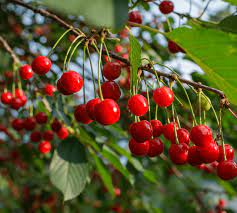

In [2]:
dest = 'Agricultural-crops/Cherry/image15.jpeg'
Image.open(dest).to_thumb(256,256)

## Train model

In [3]:
path = Path('Agricultural-crops')

In [5]:
crop_datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=101),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
)

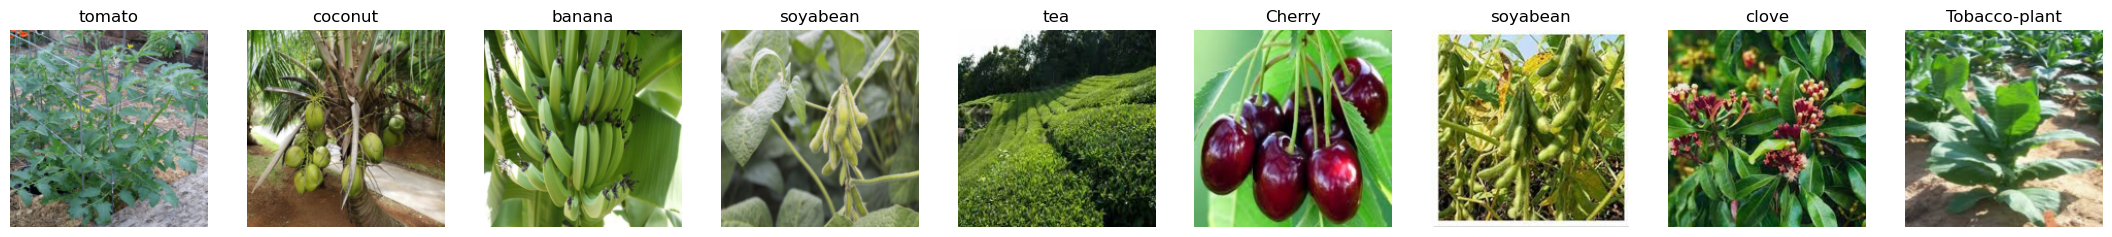

In [7]:
dls = crop_datablock.dataloaders(path)
dls.show_batch(max_n=9, nrows=1)

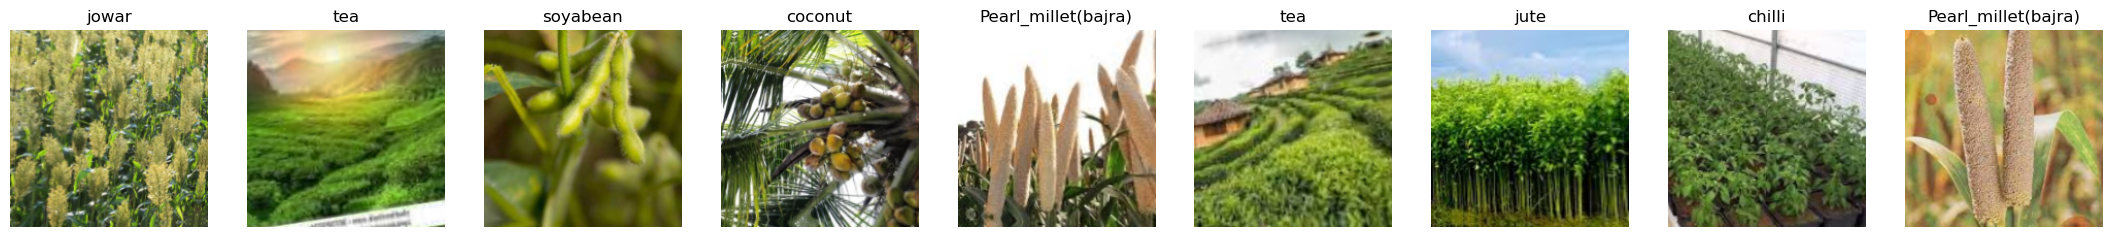

In [10]:
#Trying data augmentation
crop_datablock = crop_datablock.new(item_tfms=Resize(192), batch_tfms=aug_transforms())
dls = crop_datablock.dataloaders(path)
dls.train.show_batch(max_n=9, nrows=1)

In [11]:
#Tok 16 min
learn = vision_learner(dls, resnet101, metrics=[error_rate, accuracy])
learn.fine_tune(5)

C:\Users\H P\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\H P\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,4.050847,1.742039,0.472727,0.527273,02:14


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.397129,1.089245,0.303030,0.696970,02:48
1,1.074448,0.869101,0.224242,0.775758,02:54
2,0.816386,0.820174,0.248485,0.751515,02:46
3,0.630912,0.744874,0.200000,0.800000,02:49
4,0.505783,0.740344,0.206061,0.793939,02:56


In [14]:
learn.export('resnet101_export.pkl')

In [18]:
loaded_model = load_learner('resnet101_export.pkl')

In [20]:
crop_name, _, probs = learn.predict(PILImage.create('lemon-tree-growing-in-pot-ss2218782445.jpg'))
print(f'This is a: {crop_name}.')
print(f"Probability it's a {crop_name}: {probs[0]:.4f}")

This is a: Lemon.
Probability it's a Lemon: 0.0000
